In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('ch2_data.csv')
data = data['x'].values

# ポアソン分布と最尤推定

## データの要約
ある植物の趣旨の数=カウントデータ

In [4]:
data[:5]

array([2, 2, 4, 6, 4])

In [5]:
#delta degrees of freedom = ddof =1で不偏分散
print('data mean: {:.4f}'.format(np.mean(data)))
print('data variance: {:.4f}'.format(np.var(data, ddof=1)))
print('data std : {:.4f}'.format(np.std(data, ddof=1)))

data mean: 3.5600
data variance: 2.9861
data std : 1.7280


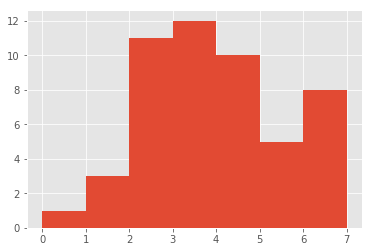

In [6]:
plt.hist(data ,bins=7);

## ポアソン分布

$$
p(y\mid\lambda) = \frac{\lambda^{y}exp(-\lambda)}{y!}
$$

乱数の生成は
- numpy.random.poisson()
- scipy.stats.poission.rvs()

の2つが存在する

In [7]:
data_mean = np.mean(data)

In [8]:
poisson_values = np.random.poisson(lam = data_mean, size=50)
poisson_values

array([4, 4, 5, 7, 1, 7, 2, 2, 5, 4, 3, 2, 3, 3, 4, 6, 1, 2, 3, 1, 8, 6,
       3, 6, 3, 2, 4, 1, 3, 4, 3, 6, 2, 6, 2, 6, 3, 4, 3, 2, 7, 7, 2, 5,
       1, 2, 2, 3, 2, 3])

In [9]:
#rvsはrandom variablesの略
poisson_values = stats.poisson.rvs(data_mean, size=50)
poisson_values

array([2, 6, 2, 3, 6, 5, 3, 1, 5, 6, 4, 5, 3, 1, 4, 5, 3, 6, 3, 7, 2, 1,
       5, 4, 6, 3, 4, 4, 4, 2, 4, 1, 4, 4, 8, 5, 3, 1, 1, 0, 5, 3, 2, 7,
       2, 4, 8, 4, 3, 6])

確率分布を計算するにはscipy.stats.poissonのpmf(probability mass function)で出力できる

In [10]:
y = np.arange(9)
prob = [stats.poisson.pmf(i, data_mean) for i in y]
prob

[0.028438824714184505,
 0.10124221598249684,
 0.18021114444884434,
 0.21385055807929532,
 0.1903269966905728,
 0.13551282164368783,
 0.08040427417525478,
 0.040891316580558154,
 0.01819663587834836]

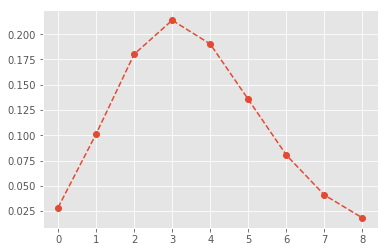

In [11]:
plt.plot(y, prob, 'o--');

確率質量関数と目的変数yの分布を重ねる

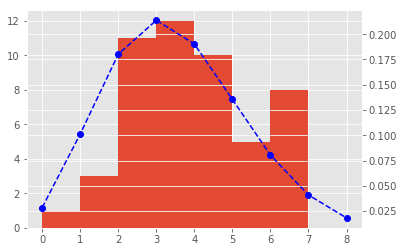

In [12]:
fig, ax = plt.subplots(1, 1)
ax.hist(data ,bins=7)
ax2 = ax.twinx()
ax2.plot(y, prob, 'o--' , c='b');

## 最尤推定法

種子の数がポアソン分布に従うと仮定した場合(仮定はあくまでもモデリングする人が決める)、これは種子の数はポアソン分布を決めるパラメーター$\lambda$が裏(わかりやすく言えば神様)が決めており、その分布からサンプリングされて現実が生起したことを考えている。  

つまり分布を決めるパラメーター$\lambda$が決まれば種子の数が決まることなる。ではこのパラメーターはどうやって求めるのだろうか？  
それはパラメーター$\lambda$を与えた時、各事象(ここでは生存種子数)が起きる確率$p(y_{i}\mid\lambda)$の同時確率(=尤度)が最大となるような$\lambda$を考えるのが尤もらしいとする推定方法が最尤推定法である。

$$
L(\lambda)=p\left(y_{1} | \lambda\right) \times p\left(y_{2} | \lambda\right) \times \cdots \times p\left(y_{N} | \lambda\right)=\prod_{i}^{N} p\left(y_{i} | \lambda\right)=\prod_{i}^{N} \frac{\lambda^{y_{i}} e x p(-\lambda)}{y_{i} !}
$$

確率の積は扱いづらいので対数をとる

$$
\log L(\lambda)=\sum_{i}^{N}\left(y_{i} \log \lambda-\lambda-\sum_{k}^{y_{i}} \log k\right)
$$

これの対数尤度が最大となるパラメーターを求める。  
これは微分で解析的に求められて、$\lambda=3.56$となる。(ポアソン分布の最尤推定量は標本平均である)

尤度のグラフ  
解析的にもとめた$\lambda=3.56$で最大値をとっていることがわかる

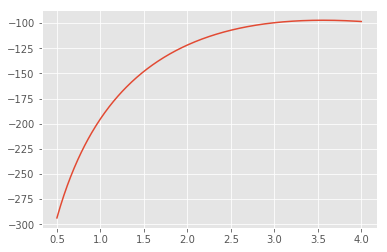

In [21]:
lambda_ = np.arange(0.5, 4.01, 0.01)
y = [np.sum(stats.poisson.logpmf(data, l)) for l in lambda_]
plt.plot(lambda_, y);

In [31]:
print('最大対数尤度: {:.3f}'.format((np.max(y))))

最大対数尤度: -97.244


# GLM(一般化線形モデル)
上記の例では、どの個体の種子数$y_{i}$も平均$\lambda$のポアソン分布に従うと仮定していた。しかし、**実際には個体毎の属性(体のサイズや肥料処理など)によってその種子数は異なるはずである。そのような個体毎に毎の属性を考慮に入れたのが一般化線形モデルである。**  

(ただし、観測された個体の属性=説明変数が同じであれば種子数は同じであるという仮定は変わらない。観測されていない、つまり「説明変数では説明できない個体差」も考慮に入れる場合は一般化線形混合モデルになる。)

In [36]:
data = pd.read_csv('data3a.csv')

In [37]:
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


yが目的変数で種子数。xが体のサイズ。fが施肥処理(C=無処理、Tが処理あり)

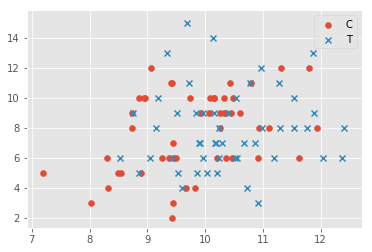

In [38]:
plt.scatter(data[data['f']=='C']['x'], data[data['f']=='C']['y'], marker='o', label='C')
plt.scatter(data[data['f']=='T']['x'], data[data['f']=='T']['y'], marker='x', label='T')
plt.legend(loc='best')
plt.show()

個体サイズが大きいほど種子数が大きそうだが、施肥処理はあまり関係なさそうだという理解をここで得る。

# ポアソン回帰
## 説明変数が数量型の統計モデル
個体の種子数$y$が、説明変数の関数として定義する必要がある。  
まず最初にパラメーター$\lambda$が体のサイズ$x$のみによって決定されると仮定してモデリングを行う。

ポアソン回帰では

$$
\lambda_{i} = exp(\beta_{1}+\beta_{2}x_{i})
$$

と定義する。


これは**カウントデータなので平均が0を下回らない**とい要請を満たすためである。  
ここで、対数をとると以下のように変形できる。

$$
\log\lambda_{i} = \beta_{1}+\beta_{2}x_{i}
$$

このときの右辺を**線形予測子**と呼び、左辺を**リンク関数**と呼ぶ。(ここでは対数を取っているので対数リンク関数)

******
pythonでGMLを使う場合はstatsmodelsを使う。  
statsmodelには2種類のAPI
- statsmodels.api
- statsmodels.formula.api

が存在する。  
statsmodel.apiでは説明変数と目的変数を受け取るピュアな関数が提供されており、一方でstatsmodel.formula.apiでは目的変数と説明変数の関係式をRのフォーマットで渡すことができる。

In [39]:
import statsmodels.formula.api as smf

results = smf.poisson('y ~ x', data=data).fit()

Optimization terminated successfully.
         Current function value: 2.353863
         Iterations 4


In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 May 2019   Pseudo R-squ.:                0.009497
Time:                        22:48:29   Log-Likelihood:                -235.39
converged:                       True   LL-Null:                       -237.64
                                        LLR p-value:                   0.03362
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [43]:
import statsmodels.api as sm

results = sm.Poisson(data['y'], sm.add_constant(data['x'])).fit()
#results = sm.GLM(data['y'], sm.add_constant(data['x']), family=sm.families.Poisson()).fit()

Optimization terminated successfully.
         Current function value: 2.353863
         Iterations 4


/Users/ktr.w/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 May 2019   Pseudo R-squ.:                0.009497
Time:                        22:49:51   Log-Likelihood:                -235.39
converged:                       True   LL-Null:                       -237.64
                                        LLR p-value:                   0.03362
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

同じ結果が返ることがわかる。

- coef : 回帰係数
- std err : 標準誤差の推定値。回帰係数のばらつきを標準偏差で表したもの。簡単にいうと同じ調査方法で同数の別のデータを取り直したりして再度推定したとするとこの程度のばらつきが生じるという意味。
- z value :回帰係数をSEで割った値(Wald統計量)。これによってWald信頼区間というものが構成でき、回帰係数がゼロから十分離れているかの粗い目安になる
- Pr>|z| : P値のようにみたてて、統計学的な検定ができると考えられる

この時の最大対数尤度はLog-Likelihood=-235.39

### 回帰係数による予測

$$
\lambda_{i} = exp(1.2917+0.0757x_{i})
$$

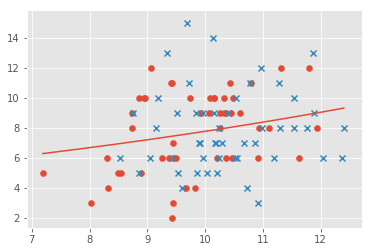

In [54]:
x = np.arange(data['x'].min(), data['x'].max()+0.01, 0.01)
y = np.exp([results.params['const']+results.params['x']*x_ for x_ in x])

plt.scatter(data[data['f']=='C']['x'], data[data['f']=='C']['y'], marker='o', label='C')
plt.scatter(data[data['f']=='T']['x'], data[data['f']=='T']['y'], marker='x', label='T')
plt.plot(x, y)
plt.show()

## 説明変数が因子型の統計モデル
次にパラメーター$\lambda$が施肥処理$f$のみによって決定されると仮定してモデリングを行う。
つまり

$$
\lambda_{i} = exp(\beta_{1}+\beta_{2}d_{i})
$$

$$
\begin{eqnarray}
d_{i}=\left\{ \begin{array}{ll}
0 & (f_{i}=C :施肥処理なし) \\
1 & (f_{i}=T:施肥処理あり) \\
\end{array} \right.
\end{eqnarray}
$$

言い換えると

個体に施肥処理がなければ

$$
\lambda_{i}= exp(\beta_{1})
$$

施肥処理があれば

$$
\lambda_{i} = exp(\beta_{1}+\beta_{2})
$$

となる

In [76]:
#ダミー変数を加える
#基準カラムCを落とすため'T'のみを指定
data['d'] = pd.get_dummies(data['f'])['T']
data.head()

,y,x,f,d
0,6,8.31,C,0
1,6,9.44,C,0
2,6,9.50,C,0
3,12,9.07,C,0
4,10,10.16,C,0


In [78]:
results = smf.poisson('y ~ d', data=data).fit()

results.summary()

Optimization terminated successfully.
         Current function value: 2.376273
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 04 May 2019   Pseudo R-squ.:               6.718e-05
Time:                        16:48:58   Log-Likelihood:                -237.63
converged:                       True   LL-Null:                       -237.64
                                        LLR p-value:                    0.8582
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
d              0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

この時の最大尤度は-237.63となって、体のサイズのみでモデリングしたときより当てはまりが悪くなっている。

## 説明変数が数量型と因子型の統計モデル

$$
\lambda_{i} = exp(\beta_{1}+\beta_{2}x_{i}+ \beta_{3}d_{i})
$$

In [79]:
results = smf.poisson('y ~ x + d', data=data).fit()

results.summary()

Optimization terminated successfully.
         Current function value: 2.352937
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 May 2019   Pseudo R-squ.:                0.009887
Time:                        16:53:27   Log-Likelihood:                -235.29
converged:                       True   LL-Null:                       -237.64
                                        LLR p-value:                   0.09542
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
d             -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

最大対数尤度は-235.29となって、数量型のみ、因子型のみに比べて当てはまりがよくなっている。この議論は別のノートブックで行う

## ポアソン回帰モデルの解釈

得られた回帰係数を解釈する
パラメーター$\lambda$は以下のように表される

$$
\lambda_{i} = exp(1.2631+0.0801x_{i}-0.032d_{i})
$$

これはつまり

$$
\lambda_{i} = exp(1.2631) \times exp(0.0801x_{i}) \times exp( -0.032d_{i})
$$

このように平均は掛け算の形で平均に影響を与えている

恒等リンク関数を使用した場合は単純な足し算となる。仮に恒等リンク関数を使用した場合は平均種子数$\lambda$がマイナスで出力される可能性もあり、それは妥当なモデルとは言えない。